In [ ]:
# Importando os pacotes essenciais
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
!jt -t oceans16 -f fira -fs 12 -tfs 14

In [ ]:
# importando os dados
df_planilha_fundos = pd.read_excel('planilha_fundos.xlsx', sheet_name = 'Planilha1')

In [ ]:
df_planilha_fundos

,FUNDOS,Rentabilidade,Volatilidade,Índice Sharpe,Patrimônio Líquido,Maior retorno mensal,Menor retorno mensal,Meses acima do CDI,Meses abaixo do CDI
0,Alaska Institucional FIA,0.546800,0.3387,-0.26,1180.00,0.1878,-0.3220,40,32
1,Western Asset Valuation FIA,-0.008000,0.3282,-0.79,65.07,0.1666,-0.3260,70,82
2,XP Investor Ibovespa Ativo FIC FIA,0.407300,0.3134,-0.45,42.87,0.1554,-0.3298,36,28
3,XP Investor 30 FIC FIA,0.377300,0.3166,-0.59,205.52,0.1421,-0.3792,45,26
4,Vinland Long Only FIC FIA,0.425300,0.2918,-0.36,267.76,0.1328,-0.2135,30,20
5,Verde AM Long Bias FIC FIA,-0.100800,0.3349,-0.84,157.84,0.1829,-0.3147,41,31
6,Truxt I Valor Institucional FIC FIA,0.259800,0.3327,-0.39,922.73,0.1620,-0.2992,38,28
7,Sharp Equity Value Institucional FIA,0.165600,0.3185,-0.57,470.32,0.1313,-0.3186,64,51
8,Selection Ações FIC FIA,0.104500,0.3076,-0.73,38.57,13.1200,-0.3189,24,20
9,Occam FIC FIA,0.300200,0.2875,-0.44,991.88,0.1602,-0.2702,77,77


In [ ]:
# Calcula a correlação entre as variáveis
df_planilha_fundos.corr()

,Rentabilidade,Volatilidade,Índice Sharpe,Patrimônio Líquido,Maior retorno mensal,Menor retorno mensal,Meses acima do CDI,Meses abaixo do CDI
Rentabilidade,1.000000,-0.410668,0.809979,0.276336,-0.038641,0.165740,-0.110719,-0.121766
Volatilidade,-0.410668,1.000000,-0.230217,0.051712,-0.007594,-0.331410,-0.074171,-0.062694
Índice Sharpe,0.809979,-0.230217,1.000000,0.254756,-0.047125,0.343217,-0.202826,-0.175694
Patrimônio Líquido,0.276336,0.051712,0.254756,1.000000,-0.117422,0.215332,0.036089,0.027480
Maior retorno mensal,-0.038641,-0.007594,-0.047125,-0.117422,1.000000,-0.003351,-0.164013,-0.159837
Menor retorno mensal,0.165740,-0.331410,0.343217,0.215332,-0.003351,1.000000,-0.069650,0.001962
Meses acima do CDI,-0.110719,-0.074171,-0.202826,0.036089,-0.164013,-0.069650,1.000000,0.957011
Meses abaixo do CDI,-0.121766,-0.062694,-0.175694,0.027480,-0.159837,0.001962,0.957011,1.000000


In [ ]:
df_planilha_fundos.describe()

,Rentabilidade,Volatilidade,Índice Sharpe,Patrimônio Líquido,Maior retorno mensal,Menor retorno mensal,Meses acima do CDI,Meses abaixo do CDI
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.157450,0.311646,-0.624444,312.590926,0.410022,-0.313017,65.740741,56.111111
std,0.220590,0.031277,0.266654,296.657275,1.764206,0.095715,34.482254,30.347464
min,-0.452800,0.223100,-1.160000,1.120000,0.116600,-0.426800,18.000000,17.000000
25%,0.017425,0.291975,-0.810000,81.135000,0.137275,-0.355750,38.000000,28.500000
50%,0.152250,0.312050,-0.645000,216.365000,0.155200,-0.323400,70.000000,54.000000
75%,0.326075,0.328575,-0.442500,435.285000,0.170000,-0.295425,80.750000,74.750000
max,0.818100,0.425000,0.040000,1180.000000,13.120000,0.278700,170.000000,150.000000


In [ ]:
df_planilha_fundos = df_planilha_fundos.dropna()

In [ ]:
df_planilha_fundos

,FUNDOS,Rentabilidade,Volatilidade,Índice Sharpe,Patrimônio Líquido,Maior retorno mensal,Menor retorno mensal,Meses acima do CDI,Meses abaixo do CDI
0,Alaska Institucional FIA,0.546800,0.3387,-0.26,1180.00,0.1878,-0.3220,40,32
1,Western Asset Valuation FIA,-0.008000,0.3282,-0.79,65.07,0.1666,-0.3260,70,82
2,XP Investor Ibovespa Ativo FIC FIA,0.407300,0.3134,-0.45,42.87,0.1554,-0.3298,36,28
3,XP Investor 30 FIC FIA,0.377300,0.3166,-0.59,205.52,0.1421,-0.3792,45,26
4,Vinland Long Only FIC FIA,0.425300,0.2918,-0.36,267.76,0.1328,-0.2135,30,20
5,Verde AM Long Bias FIC FIA,-0.100800,0.3349,-0.84,157.84,0.1829,-0.3147,41,31
6,Truxt I Valor Institucional FIC FIA,0.259800,0.3327,-0.39,922.73,0.1620,-0.2992,38,28
7,Sharp Equity Value Institucional FIA,0.165600,0.3185,-0.57,470.32,0.1313,-0.3186,64,51
8,Selection Ações FIC FIA,0.104500,0.3076,-0.73,38.57,13.1200,-0.3189,24,20
9,Occam FIC FIA,0.300200,0.2875,-0.44,991.88,0.1602,-0.2702,77,77


In [ ]:
planilha_fundos_matriz = df_planilha_fundos.values

In [ ]:
planilha_fundos_matriz = planilha_fundos_matriz[:, 1:]

In [ ]:
planilha_fundos_matriz.shape

(54, 8)

In [ ]:
st = StandardScaler()
planilha_fundos_matriz_padronizada = st.fit_transform(planilha_fundos_matriz)
planilha_fundos_matriz_padronizada

array([[ 1.78161137,  0.87309681,  1.37956457,  2.95139885, -0.12714437,
        -0.09473632, -0.75350187, -0.80196196],
       [-0.75707797,  0.53423317, -0.62669244, -0.84220121, -0.13927395,
        -0.13691947,  0.12468017,  0.8610928 ],
       [ 1.14327835,  0.0565968 ,  0.66034036, -0.91773773, -0.14568202,
        -0.17699346, -0.87059281, -0.93500634],
       [ 1.00600243,  0.15986953,  0.13038568, -0.3643137 , -0.15329161,
        -0.69795533, -0.6071382 , -1.00152853],
       [ 1.2256439 , -0.64049412,  1.00102551, -0.15253927, -0.15861261,
         1.04948156, -1.04622922, -1.2010951 ],
       [-1.18171814,  0.75046045, -0.81596197, -0.52654707, -0.12994791,
        -0.01775207, -0.72422914, -0.83522306],
       [ 0.46833841,  0.67946045,  0.8874638 ,  2.07602597, -0.14190584,
         0.14570762, -0.81204734, -0.93500634],
       [ 0.03729202,  0.22118771,  0.20609349,  0.53668035, -0.15947083,
        -0.05888064, -0.05095624, -0.17000115],
       [-0.24229327, -0.13058502

C:\Users\pedro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


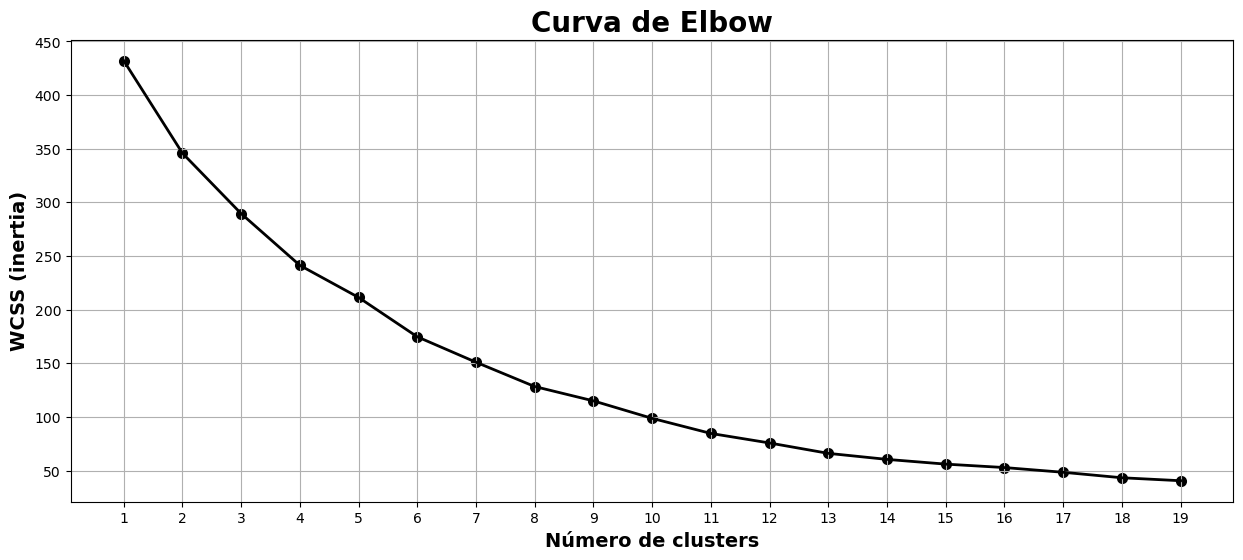

In [ ]:
# Observando a curva de Elbow
l=[]
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(planilha_fundos_matriz_padronizada)
    l.append(km.inertia_)

plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(l)), l, c = 'black', lw = 2)
plt.xticks(range(1,1+len(l)))
plt.grid()
plt.show()

In [ ]:
# gerando os clusters de acordo com a curva de Elbow
km = KMeans(n_clusters = 4)

In [ ]:
km.fit(planilha_fundos_matriz_padronizada)

KMeans(n_clusters=4)

In [ ]:
df_planilha_fundos['km3'] = km.predict(planilha_fundos_matriz_padronizada)
df_planilha_fundos.km3.unique()

array([3, 0, 2, 1])

In [ ]:
df_planilha_fundos

,FUNDOS,Rentabilidade,Volatilidade,Índice Sharpe,Patrimônio Líquido,Maior retorno mensal,Menor retorno mensal,Meses acima do CDI,Meses abaixo do CDI,km3
0,Alaska Institucional FIA,0.546800,0.3387,-0.26,1180.00,0.1878,-0.3220,40,32,3
1,Western Asset Valuation FIA,-0.008000,0.3282,-0.79,65.07,0.1666,-0.3260,70,82,0
2,XP Investor Ibovespa Ativo FIC FIA,0.407300,0.3134,-0.45,42.87,0.1554,-0.3298,36,28,3
3,XP Investor 30 FIC FIA,0.377300,0.3166,-0.59,205.52,0.1421,-0.3792,45,26,3
4,Vinland Long Only FIC FIA,0.425300,0.2918,-0.36,267.76,0.1328,-0.2135,30,20,3
5,Verde AM Long Bias FIC FIA,-0.100800,0.3349,-0.84,157.84,0.1829,-0.3147,41,31,0
6,Truxt I Valor Institucional FIC FIA,0.259800,0.3327,-0.39,922.73,0.1620,-0.2992,38,28,3
7,Sharp Equity Value Institucional FIA,0.165600,0.3185,-0.57,470.32,0.1313,-0.3186,64,51,3
8,Selection Ações FIC FIA,0.104500,0.3076,-0.73,38.57,13.1200,-0.3189,24,20,2
9,Occam FIC FIA,0.300200,0.2875,-0.44,991.88,0.1602,-0.2702,77,77,3


In [ ]:
lista_dados = []
for dado in df_planilha_fundos:
    lista_dados.append(dado)

print(lista_dados)

['FUNDOS', 'Rentabilidade', 'Volatilidade', ' Índice Sharpe', 'Patrimônio Líquido', 'Maior retorno mensal', 'Menor retorno mensal', 'Meses acima do CDI', 'Meses abaixo do CDI', 'km3']


In [ ]:
# Separando os fundos por cluster
numero_de_clusters=4  # informe o número de clusters

for cluster in range(numero_de_clusters):
    print("Cluster:", cluster)
    print(df_planilha_fundos.loc[df_planilha_fundos.km3 == cluster]['FUNDOS'])
    print("____________________________________________________________________________________________________________________")
print("Análise exploratória por cluster:")

for dimensao in lista_dados: #df_dados2.groupby('km3').describe():
    if dimensao !='FUNDOS' and dimensao!= 'km3':
        print(dimensao+':')
        print(df_planilha_fundos.groupby('km3').describe()[dimensao])
        print("_______________________________________________________________________________________________________")



Cluster: 0
1               Western Asset Valuation FIA
5                Verde AM Long Bias FIC FIA
13                Equitas Selection FIC FIA
14       Brasil Capital 30 Advisory FIC FIA
17                        Atlas One FIC FIA
20                            Vista FIC FIA
22             SulAmérica Selection FIC FIA
23                  SulAmérica Equities FIA
29                    Neo Navitas B FIC FIA
32    Leblon Ações II Institucional FIC FIA
33                  Kiron Institucional FIA
36                      Joule Value FIC FIA
38                            Indie FIC FIA
45               BNP Paribas Small Caps FIA
49           Athena Total Return II FIC FIA
Name: FUNDOS, dtype: object
____________________________________________________________________________________________________________________
Cluster: 1
11            Icatu Vanguarda Dividendos FIA
12     Franklin Valor e Liquidez FVL FIC FIA
15                Bahia AM Valuation FIC FIA
16                    AZ Quest Ações F

In [ ]:
for dimensao in lista_dados: #df_dados2.groupby('km3').describe():
    if dimensao !='FUNDOS' and dimensao!= 'km3':
        print(dimensao+':')
        print(df_planilha_fundos.groupby('km3').describe()[dimensao])
        print("__________")


Rentabilidade:
     count      mean       std     min      25%     50%      75%     max
km3                                                                     
0     15.0 -0.040653  0.163177 -0.4528 -0.11255 -0.0080  0.06745  0.1538
1     19.0  0.137685  0.130590 -0.1093  0.03765  0.1520  0.19530  0.4103
2      1.0  0.104500       NaN  0.1045  0.10450  0.1045  0.10450  0.1045
3     19.0  0.336400  0.196058 -0.0358  0.25875  0.3434  0.40475  0.8181
__________
Volatilidade:
     count      mean       std     min      25%     50%      75%     max
km3                                                                     
0     15.0  0.341813  0.028392  0.3079  0.32450  0.3344  0.35325  0.4250
1     19.0  0.289289  0.026146  0.2231  0.27765  0.2912  0.30750  0.3276
2      1.0  0.307600       NaN  0.3076  0.30760  0.3076  0.30760  0.3076
3     19.0  0.310400  0.016771  0.2837  0.29715  0.3134  0.31775  0.3387
__________
 Índice Sharpe:
     count      mean       std   min    25%   50%   75%  